In [1]:
from Dataset import build_dataset
from Diffusion import DiffusionModel
import matplotlib.pyplot as plt

In [50]:
n_rows = 64*400  # Total number of rows in the dataset
n_samples_per_row = 100  # Samples per row (from GMM)
means = [0, 5, -5]  # Means of the Gaussian components
variances = [1, 0.5, 0.78]  # Variances of the components
weights = [0.4, 0.4, 0.2]  # Mixing coefficients (must sum to 1)

# Generate the dataset
dataset, mean, var  = build_dataset(n_rows, n_samples_per_row, means, variances, weights, 32)

In [80]:
data = next(iter(dataset))

In [82]:
data.flatten().shape

(3200,)

In [3]:
model = DiffusionModel(42, 100, (40), 100, 1e-5, False, 40, 1000,  0.3, 60, 1e-4, 32)
model.training(dataset)
l = model.sampling_DDPM()

  0%|          | 0/4 [00:00<?, ?it/s]

Loss at epoch  0  is  2.2902775


  0%|          | 0/4 [00:00<?, ?it/s]

Loss at epoch  1  is  2.200542


  0%|          | 0/4 [00:00<?, ?it/s]

Loss at epoch  2  is  2.1306658


  0%|          | 0/4 [00:00<?, ?it/s]

Loss at epoch  3  is  2.0839803


  0%|          | 0/999 [00:00<?, ?it/s]

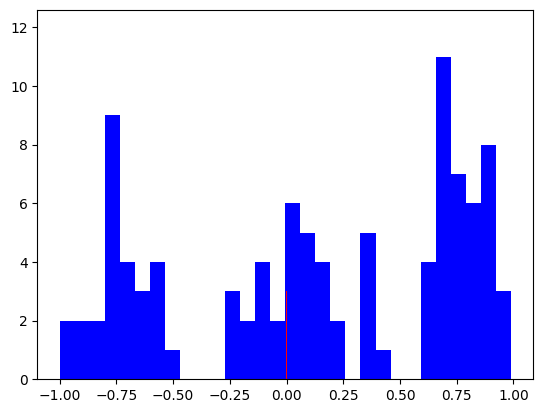

In [4]:
plt.hist(next(iter(dataset))[0], bins=30,color='blue')
plt.hist(l[-1].squeeze(), bins=30, color='red')
plt.show()